In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

/home/aapopovkin/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def gen_dataset(nClasses, a0, b0, L, classProbs=None):
    if classProbs is None:
        classProbs = sps.beta(a0, b0).rvs(size=nClasses)
    samples = sps.binom(n=L, p=classProbs).rvs()
    return L, samples, classProbs

In [3]:
data = gen_dataset(10, 1, 2, 20)
data

(20,
 array([ 1,  2,  1,  0,  4,  8,  3, 17,  7,  2]),
 array([0.03285014, 0.05461591, 0.01970722, 0.1208564 , 0.18692436,
        0.40884231, 0.30140101, 0.78711827, 0.36109327, 0.0934294 ]))

In [4]:
def apply_model(L, a, a0, b0):
    # a0, b0 -- prior
    b = L - a
    p_pred = (a0 - 1 + a) / (a0 + b0 + a + b - 2)
    return p_pred

In [5]:
def LLp(L, a, p_pred):
    b = L - a
    A = a.sum()
    B = b.sum()
    const_p = A / (A + B)
    #print ((np.log(p_pred) * a + np.log(1 - p_pred) * b).sum())
    #print( np.log(const_p) * A + np.log(1 - const_p) * B)
    llp = (np.log(p_pred) * a + np.log(1 - p_pred) * b).sum() - np.log(const_p) * A - np.log(1 - const_p) * B
    llp /= A
    return llp

In [6]:
nClasses = 100
a0 = 10
b0 = 3
L = 60;

data = gen_dataset(nClasses, a0, b0, L)
data2 = gen_dataset(nClasses, a0, b0, L, classProbs=data[2])
a = data[1]
test = data2[1]
#data, data2

In [7]:
apply_model(L, a, a0, b0)

array([0.85915493, 0.73239437, 0.61971831, 0.81690141, 0.78873239,
       0.83098592, 0.61971831, 0.85915493, 0.90140845, 0.76056338,
       0.91549296, 0.83098592, 0.8028169 , 0.67605634, 0.83098592,
       0.91549296, 0.74647887, 0.84507042, 0.6056338 , 0.78873239,
       0.91549296, 0.84507042, 0.63380282, 0.83098592, 0.85915493,
       0.85915493, 0.5915493 , 0.73239437, 0.83098592, 0.66197183,
       0.88732394, 0.63380282, 0.88732394, 0.67605634, 0.78873239,
       0.5915493 , 0.70422535, 0.85915493, 0.69014085, 0.61971831,
       0.88732394, 0.78873239, 0.85915493, 0.78873239, 0.83098592,
       0.85915493, 0.83098592, 0.8028169 , 0.50704225, 0.64788732,
       0.88732394, 0.66197183, 0.95774648, 0.67605634, 0.54929577,
       0.6056338 , 0.6056338 , 0.90140845, 0.64788732, 0.8028169 ,
       0.70422535, 0.74647887, 0.76056338, 0.61971831, 0.71830986,
       0.90140845, 0.71830986, 0.6056338 , 0.81690141, 0.84507042,
       0.71830986, 0.73239437, 0.74647887, 0.8028169 , 0.90140

In [8]:
LLp(L, a, apply_model(L, a, a0, b0))

0.055254072353200526

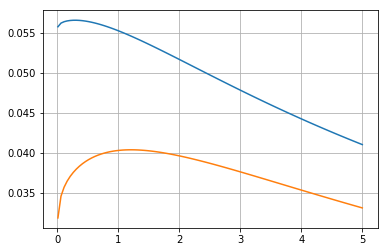

In [9]:
x = np.linspace(0.01, 5, 100)
plt.plot(x, [LLp(L, a, apply_model(L, a, a0 * x_, b0 * x_)) for x_ in x])
plt.plot(x, [LLp(L, test, apply_model(L, a, a0 * x_, b0 * x_)) for x_ in x])
plt.grid()
plt.show()

In [10]:
nClasses = 50
a0 = 10
b0 = 3
L = 10
data = gen_dataset(nClasses, a0, b0, L)
#data2 = gen_dataset(nClasses, a0, b0, L, classProbs=data[2])
a = data[1]
test = L * data[2]
#data, data2

In [11]:
borders = sps.beta(a0, b0).cdf(np.linspace(0, 1.000, 100))

In [12]:
def linise(x, y):
    x = np.array(x)
    y = np.array(y)
    ids = (y == y)
    x = x[ids]
    y = y[ids]
    
    solve = sps.linregress(x, y)
    space = np.linspace(x.min() - 0.1, x.max() + 0.1, 2)
    return space, space * solve.slope + solve.intercept

/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
/home/aapopovkin/venv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  


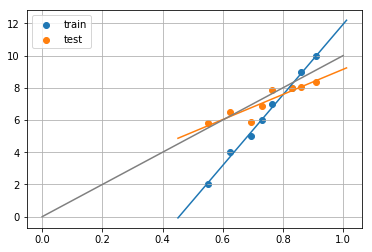

In [13]:
probs = apply_model(L, a, a0, b0)#a0 * 0.12, b0 * .4)

cca = []
cctest = []
for i in range(borders.shape[0] - 1):
    ids = (probs > borders[i]) * (probs < borders[i + 1])
    cca.append(a[ids].mean())
    cctest.append(test[ids].mean())

#plt.figure(figsize=(15, 10))

plt.scatter(borders[1:], cca, label='train')
sp, vals = linise(borders[1:], cca)
plt.plot(sp, vals)

plt.scatter(borders[1:], cctest, label='test')
sp, vals = linise(borders[1:], cctest)
plt.plot(sp, vals)

plt.plot([0, 1], [0, L], c='grey')

plt.grid()
plt.legend()
plt.show()

In [14]:
import catboost

/home/aapopovkin/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [15]:
def calc_cc(bins, L, nClasses, a0, b0, prior_a0, prior_b0):
    borders = sps.beta(a0, b0).cdf(np.linspace(0, 1.000, bins))
    data = gen_dataset(nClasses, a0, b0, L)
    train = data[1]
    test = L * data[2]

    probs1 = apply_model(L, train, prior_a0, prior_b0)

    dft = np.zeros(train.shape[0] * L)
    dtr = np.ones(train.shape[0] * L)
    for i, num in enumerate(train):
        dtr[L * i:L * i + L][np.arange(L) > num] = 0
        dft[L * i:L * i + L] = i

    #probs = catboost.CatBoostClassifier(verbose=False).fit(dft, dtr).predict_proba(np.arange(train.shape[0]))[:, 1]
    #print (probs1.shape, probs.shape)
    
    probs = probs1
    
    cc_train = []
    cc_test = []
    for i in range(borders.shape[0] - 1):
        ids = (probs > borders[i]) * (probs < borders[i + 1])
        cc_train.append(train[ids].mean() / L)
        #ids = (probs1 > borders[i]) * (probs1 < borders[i + 1])
        cc_test.append(test[ids].mean() / L)
        
    #return np.array(cc_train), np.array(cc_test), borders

    ids = np.argsort(probs)
    borders = probs[np.array([0] + list(ids))]
    cc_train = train[ids] / L
    cc_test = test[ids] / L
    
    return np.array(cc_train), np.array(cc_test), borders


def get_lines(cc_train, cc_test, borders):
    x = borders[1:]
    ids = (cc_train == cc_train)
    cc_train = cc_train[ids]
    cc_test = cc_test[ids]
    x = x[ids]
    
    trs = sps.linregress(x, cc_train)
    tes = sps.linregress(x, cc_test)
    return trs, tes, borders[1:][ids].min(), borders[1:][ids].max()


def get_cc_stats(cc_train, cc_test, borders):
    trs, tes, _, _ = get_lines(cc_train, cc_test, borders)
    posx = (tes.intercept - trs.intercept) / (trs.slope - tes.slope)
    posy = tes.intercept + tes.slope * posx
    shift = (posx - posy) / (2 ** 0.5)
    slope = np.arctan(trs.slope)
    alpha = np.arctan(trs.slope) - np.arctan(tes.slope)
    return shift, slope, alpha


def plot_cc(cc_train, cc_test, borders):
    plt.scatter(borders[1:], cc_train, label='train')
    plt.scatter(borders[1:], cc_test, label='test')
    
    trs, tes, left, right = get_lines(cc_train, cc_test, borders)
    space = np.linspace(left, right, 2)

    plt.plot(space, space * trs.slope + trs.intercept)
    plt.plot(space, space * tes.slope + tes.intercept)

    plt.plot([0, 1], [0, 1], c='grey')

    plt.grid()
    plt.legend()
    plt.show()

/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
/home/aapopovkin/venv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice.


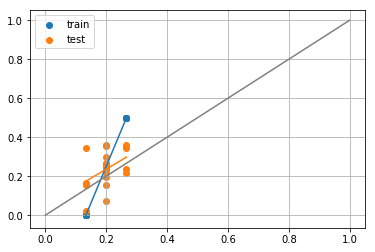

(-0.025863691206785392, 1.3101939350475555, 0.5641461058348455)

In [75]:
tr, te, bor = calc_cc(15, 4, 20, 3, 10, 3, 10)
plot_cc(tr, te, bor)
get_cc_stats(tr, te, bor)

In [17]:
from tqdm import tqdm_notebook as tqdm
import random

In [18]:
data = []
for i in tqdm(range(3, 20, 1)):
    for q in range(100):
        tr, te, bor = calc_cc(100, i, 150, 10, 3, 2, 3)
        sh, sl, al = get_cc_stats(tr, te, bor)
        #print (tr)
        ids = np.random.choice(np.arange(tr.shape[0]), 10)
        #print ((tr * i)[ids])
        #print ((bor[1:] * i)[ids])
        llp = LLp(i, tr * i, bor[1:])
        llp2 = LLp(i, te * i, bor[1:])
        #print (llp)
        data.append([sh, sl, al, llp, llp2])
data = np.array(data).T

/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
/home/aapopovkin/venv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice.


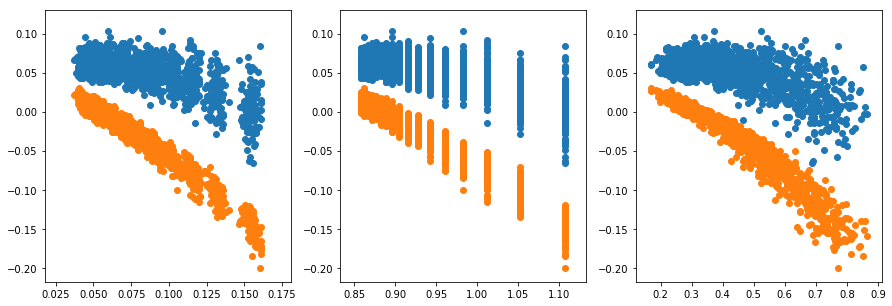

In [19]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(np.abs(data[i]), data[3])
    plt.scatter(np.abs(data[i]), data[4])
plt.show()

In [20]:
tg1 = np.tan(data[1])
tg2 = np.tan(data[1] - data[2])
tg = tg1/tg2

In [21]:
def means(d, step=10):
    c = np.cumsum(d)
    return (c[step - 1::step] - c[:-step + 1:step]) / step

In [22]:
D_ = []
for q in range(100):
    i = 10000
    tr, te, bor = calc_cc(100, i, 150, 10, 3, 2, 3)
    sh, sl, al = get_cc_stats(tr, te, bor)
    #print (tr)
    ids = np.random.choice(np.arange(tr.shape[0]), 10)
    #print ((tr * i)[ids])
    #print ((bor[1:] * i)[ids])
    llp = LLp(i, tr * i, bor[1:])
    llp2 = LLp(i, te * i, bor[1:])
    #print (llp)
    D_.append([sh, sl, al, llp, llp2])

/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
/home/aapopovkin/venv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice.


In [23]:
mean_ = 50

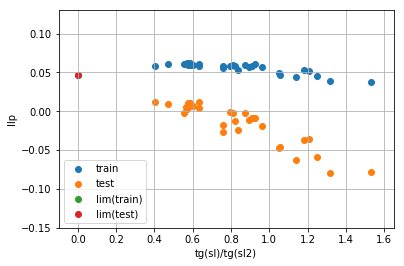

In [24]:
plt.scatter(np.log(tg[mean_ - 1::mean_]), means(data[3], mean_), label='train')
plt.scatter(np.log(tg[mean_ - 1::mean_]), means(data[4], mean_), label='test')
plt.scatter([0], [np.array(D_).T[3].mean()], label='lim(train)')
plt.scatter([0], [np.array(D_).T[4].mean()], label='lim(test)')

plt.ylabel("llp")
plt.xlabel("tg(sl)/tg(sl2)")
plt.xlim((-.1, 1.65))
plt.ylim((-.15, .13))
plt.legend()
plt.grid()
plt.show()

/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice.
/home/aapopovkin/venv/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aapopovkin/venv/lib/python3.5/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice.


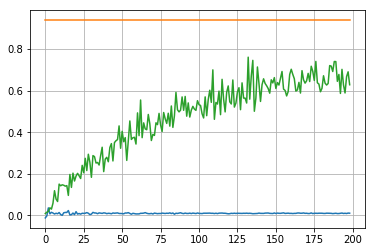

In [25]:
points = np.array([get_cc_stats(*calc_cc(100, 30, 100, 10 * i / 20, 3 * i / 20, 10, 3)) for i in range(1, 200)])
plt.plot(points.T[0])
plt.plot(points.T[1])
plt.plot(points.T[2])
plt.grid()
plt.show()